# House Prices: Advanced Regression Techniques
Author: Jingwen ZHENG<br>
Update: 2019-05-06

## Content
- Project understanding
- Objectif
- Practice skills
- Python packages to be applied
- Import data
- Data description

## Project understanding
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Objectif
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Practice skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

## Python packages to be applied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler


## Import data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print('Dimension train_df:', train_df.shape)
print('Dimension test_df:', test_df.shape)

Dimension train_df: (1460, 81)
Dimension test_df: (1459, 80)


In [4]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


## Data description

In [6]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Data cleaning

There are missing data in "LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence" and "MiscFeature".

Among these fields,
- 94% data of "Alley" are missing.
- 47% data of "FireplaceQu" are missing.
- 99.5% data of "PoolQC" are missing.
- 81% data of "Fence" are missing.
- 96% data of "MiscFeature" are missing.

So we will ignore them during the analysis.

What should we do on missing data of other fields? We might replace null by median value or mode value.

In [8]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)
train_df['MasVnrType'].fillna(train_df['MasVnrType'].value_counts().index[0], inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)
train_df['BsmtQual'].fillna(train_df['BsmtQual'].value_counts().index[0], inplace=True)
train_df['BsmtCond'].fillna(train_df['BsmtCond'].value_counts().index[0], inplace=True)
train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].value_counts().index[0], inplace=True)
train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].value_counts().index[0], inplace=True)
train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].value_counts().index[0], inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].value_counts().index[0], inplace=True)
train_df['GarageType'].fillna(train_df['GarageType'].value_counts().index[0], inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace=True)
train_df['GarageFinish'].fillna(train_df['GarageFinish'].value_counts().index[0], inplace=True)
train_df['GarageQual'].fillna(train_df['GarageQual'].value_counts().index[0], inplace=True)
train_df['GarageCond'].fillna(train_df['GarageCond'].value_counts().index[0], inplace=True)

In [9]:
test_df['MSZoning'].fillna(test_df['MSZoning'].value_counts().index[0], inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].median(), inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].value_counts().index[0], inplace=True)
test_df['Exterior1st'].fillna(test_df['Exterior1st'].value_counts().index[0], inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].value_counts().index[0], inplace=True)
test_df['MasVnrType'].fillna(test_df['MasVnrType'].value_counts().index[0], inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median(), inplace=True)
test_df['BsmtQual'].fillna(test_df['BsmtQual'].value_counts().index[0], inplace=True)
test_df['BsmtCond'].fillna(test_df['BsmtCond'].value_counts().index[0], inplace=True)
test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].value_counts().index[0], inplace=True)
test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].value_counts().index[0], inplace=True)
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median(), inplace=True)
test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].value_counts().index[0], inplace=True)
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].median(), inplace=True)
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median(), inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median(), inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].median(), inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].median(), inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].value_counts().index[0], inplace=True)
test_df['Functional'].fillna(test_df['Functional'].value_counts().index[0], inplace=True)
test_df['GarageType'].fillna(test_df['GarageType'].value_counts().index[0], inplace=True)
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median(), inplace=True)
test_df['GarageFinish'].fillna(test_df['GarageFinish'].value_counts().index[0], inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].median(), inplace=True)
test_df['GarageArea'].fillna(test_df['GarageArea'].median(), inplace=True)
test_df['GarageQual'].fillna(test_df['GarageQual'].value_counts().index[0], inplace=True)
test_df['GarageCond'].fillna(test_df['GarageCond'].value_counts().index[0], inplace=True)
test_df['SaleType'].fillna(test_df['GarageCond'].value_counts().index[0], inplace=True)

In [10]:
train_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
test_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [11]:
# Transform some numerical variables that are really categorical
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
train_df['OverallCond'] = train_df['OverallCond'].astype(str)
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)
test_df['OverallCond'] = test_df['OverallCond'].astype(str)
test_df['YrSold'] = test_df['YrSold'].astype(str)
test_df['MoSold'] = test_df['MoSold'].astype(str)

In [12]:
train_df.shape

(1460, 76)

In [13]:
test_df.shape

(1459, 75)

In [14]:
train_df['SalePrice_per_squareFeet'] = train_df['SalePrice'] / train_df['LotArea']

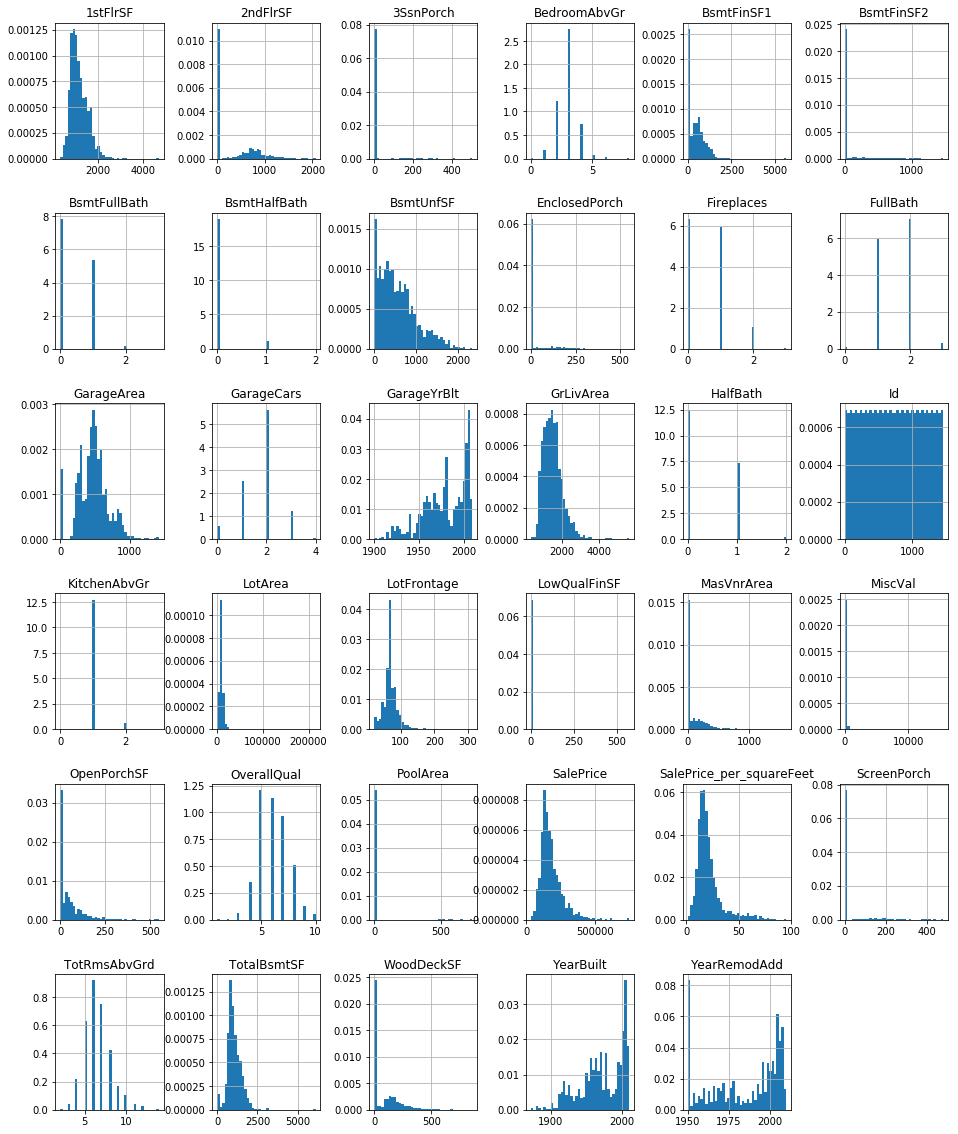

In [15]:
train_df.hist(bins=40, figsize=(16, 20), density=True)
plt.subplots_adjust(hspace=0.4, wspace=0.45)#, top=0.97, bottom=0.03, left=0.04, right=0.95)
plt.show()

According to the group of histograms, we observed that most "SalePrice" is between 130k dollars(1st quartile) and 214k dollars(3rd quartile).

## Data analysis

### Correlation matrix between numerical values and "SalePrice"

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id                          1460 non-null int64
MSSubClass                  1460 non-null object
MSZoning                    1460 non-null object
LotFrontage                 1460 non-null float64
LotArea                     1460 non-null int64
Street                      1460 non-null object
LotShape                    1460 non-null object
LandContour                 1460 non-null object
Utilities                   1460 non-null object
LotConfig                   1460 non-null object
LandSlope                   1460 non-null object
Neighborhood                1460 non-null object
Condition1                  1460 non-null object
Condition2                  1460 non-null object
BldgType                    1460 non-null object
HouseStyle                  1460 non-null object
OverallQual                 1460 non-null int64
OverallCond                 1460 non-null object
YearBuilt    

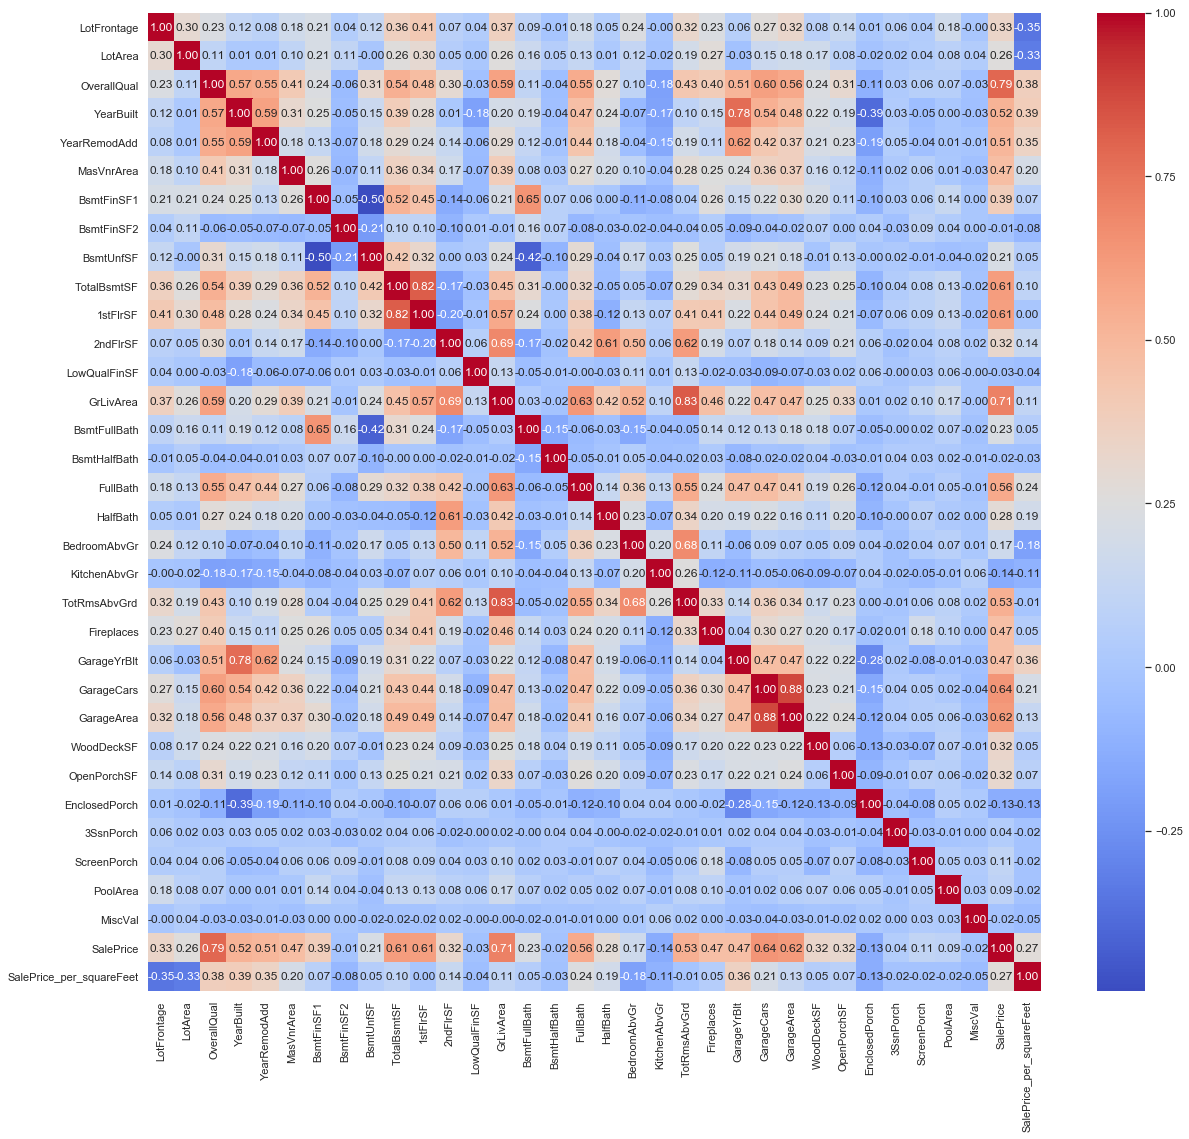

In [17]:
sns.set(rc={'figure.figsize':(20, 18)})
num_fields = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
              'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
              'PoolArea', 'MiscVal', 'SalePrice', 'SalePrice_per_squareFeet']

sns.heatmap(train_df[num_fields].corr(),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.show()

As the correlation heatmap shows, "SalePrice" is more related to "OverallQual", "GrLivArea" and "GarageCars".

### Relationship between "SalePrice" and numeric fields

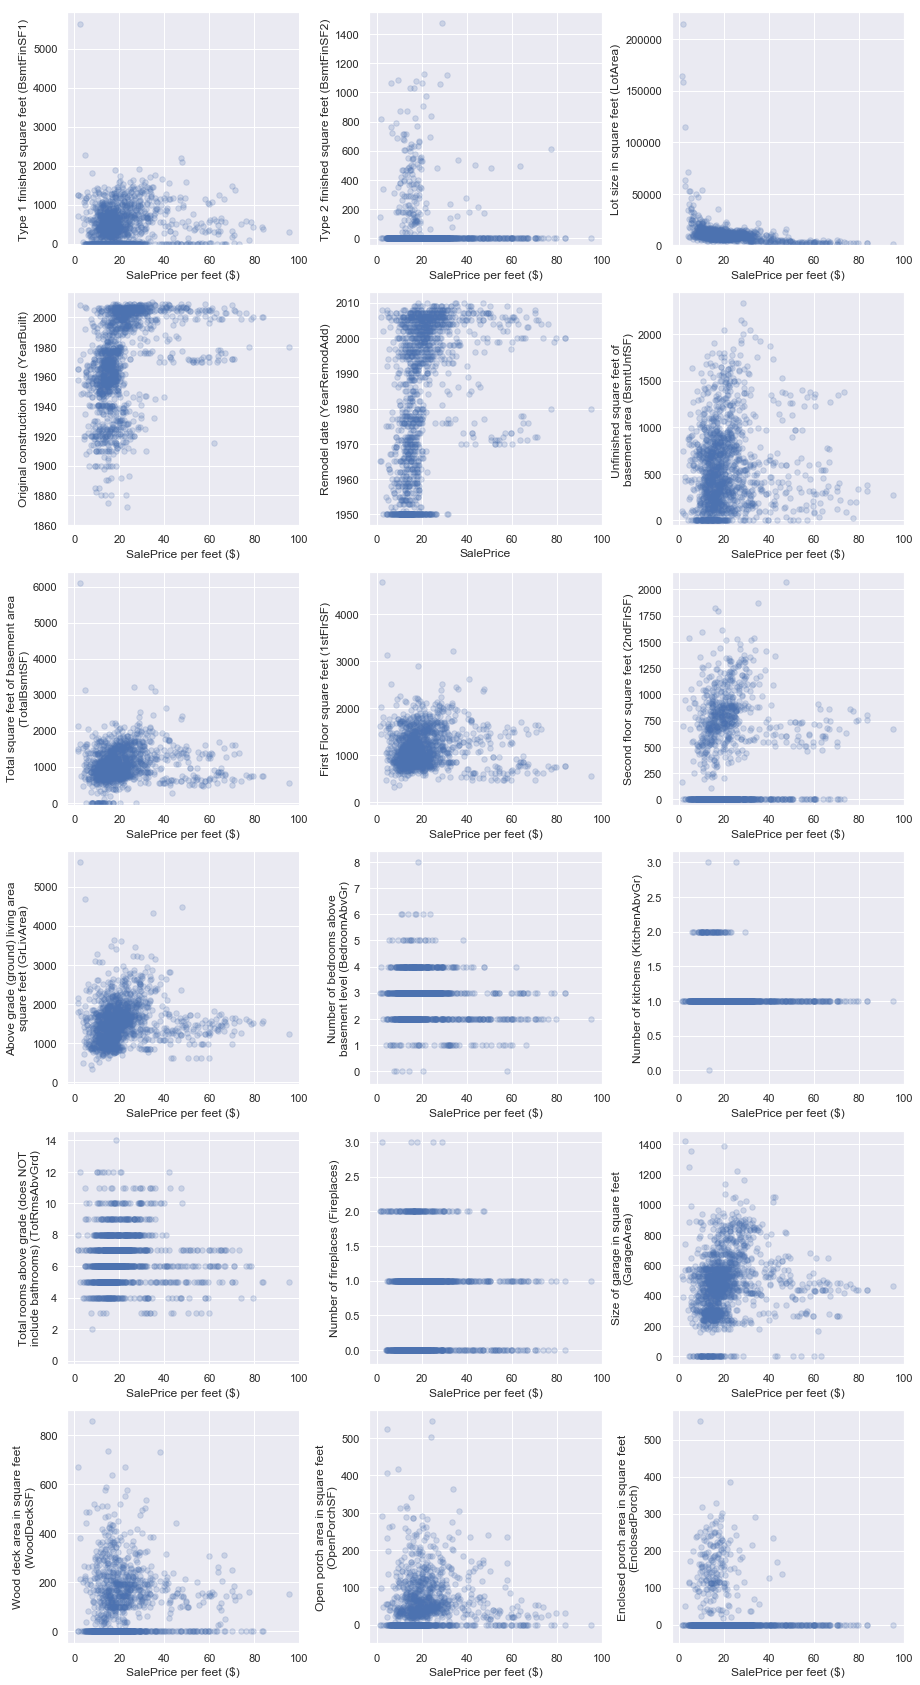

In [18]:
# plt.figure(figsize=(7, 7))
fig, axarr = plt.subplots(nrows=6, ncols=3, figsize=(15, 30))

axarr[0, 0].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['BsmtFinSF1'],
                    s=30,
                    alpha=0.2)
axarr[0, 0].set_xlabel('SalePrice per feet ($)')
axarr[0, 0].set_ylabel('Type 1 finished square feet (BsmtFinSF1)')
axarr[0, 0].set_ylim(bottom=-50)#, top=2500)

axarr[0, 1].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['BsmtFinSF2'],
                    s=30,
                    alpha=0.2)
axarr[0, 1].set_xlabel('SalePrice per feet ($)')
axarr[0, 1].set_ylabel('Type 2 finished square feet (BsmtFinSF2)')
axarr[0, 1].set_ylim(bottom=-50)#, top=2500)

axarr[0, 2].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['LotArea'],
                    s=30,
                    alpha=0.2)
axarr[0, 2].set_xlabel('SalePrice per feet ($)')
axarr[0, 2].set_ylabel('Lot size in square feet (LotArea)')
axarr[0, 2].set_ylim(bottom=-50)#, top=50000)

axarr[1, 0].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['YearBuilt'],
                    s=30,
                    alpha=0.2)
axarr[1, 0].set_xlabel('SalePrice per feet ($)')
axarr[1, 0].set_ylabel('Original construction date (YearBuilt)')
axarr[1, 0].set_ylim(bottom=1860)#, top=2500)

axarr[1, 1].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['YearRemodAdd'],
                    s=30,
                    alpha=0.2)
axarr[1, 1].set_xlabel('SalePrice')
axarr[1, 1].set_ylabel('Remodel date (YearRemodAdd)')

axarr[1, 2].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['BsmtUnfSF'],
                    s=30,
                    alpha=0.2)
axarr[1, 2].set_xlabel('SalePrice per feet ($)')
axarr[1, 2].set_ylabel('Unfinished square feet of \nbasement area (BsmtUnfSF)')
axarr[1, 2].set_ylim(bottom=-50)#, top=50000)

axarr[2, 0].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['TotalBsmtSF'],
                    s=30,
                    alpha=0.2)
axarr[2, 0].set_xlabel('SalePrice per feet ($)')
axarr[2, 0].set_ylabel('Total square feet of basement area\n(TotalBsmtSF)')
axarr[2, 0].set_ylim(bottom=-50)#, top=2500)

axarr[2, 1].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['1stFlrSF'],
                    s=30,
                    alpha=0.2)
axarr[2, 1].set_xlabel('SalePrice per feet ($)')
axarr[2, 1].set_ylabel('First Floor square feet (1stFlrSF)')
axarr[2, 1].set_ylim(bottom=-50)#, top=2500)

axarr[2, 2].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['2ndFlrSF'],
                    s=30,
                    alpha=0.2)
axarr[2, 2].set_xlabel('SalePrice per feet ($)')
axarr[2, 2].set_ylabel('Second floor square feet (2ndFlrSF)')
axarr[2, 2].set_ylim(bottom=-50)#, top=2500)

axarr[3, 0].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['GrLivArea'],
                    s=30,
                    alpha=0.2)
axarr[3, 0].set_xlabel('SalePrice per feet ($)')
axarr[3, 0].set_ylabel('Above grade (ground) living area\nsquare feet (GrLivArea)')
axarr[3, 0].set_ylim(bottom=-50)#, top=2500)

axarr[3, 1].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['BedroomAbvGr'],
                    s=30, 
                    alpha=0.2)
axarr[3, 1].set_xlabel('SalePrice per feet ($)')
axarr[3, 1].set_ylabel('Number of bedrooms above\nbasement level (BedroomAbvGr)')
axarr[3, 1].set_ylim(bottom=-0.5)#, top=2500)

axarr[3, 2].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['KitchenAbvGr'],
                    s=30, 
                    alpha=0.2)
axarr[3, 2].set_xlabel('SalePrice per feet ($)')
axarr[3, 2].set_ylabel('Number of kitchens (KitchenAbvGr)')
axarr[3, 2].set_ylim(bottom=-0.2)#, top=2500)

axarr[4, 0].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['TotRmsAbvGrd'],
                    s=30,
                    alpha=0.2)
axarr[4, 0].set_xlabel('SalePrice per feet ($)')
axarr[4, 0].set_ylabel('Total rooms above grade (does NOT\ninclude bathrooms) (TotRmsAbvGrd)')
axarr[4, 0].set_ylim(bottom=-0.2)#, top=2500)

axarr[4, 1].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['Fireplaces'],
                    s=30,
                    alpha=0.2)
axarr[4, 1].set_xlabel('SalePrice per feet ($)')
axarr[4, 1].set_ylabel('Number of fireplaces (Fireplaces)')
axarr[4, 1].set_ylim(bottom=-0.2)#, top=2500)

axarr[4, 2].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['GarageArea'],
                    s=30,
                    alpha=0.2)
axarr[4, 2].set_xlabel('SalePrice per feet ($)')
axarr[4, 2].set_ylabel('Size of garage in square feet\n(GarageArea)')
axarr[4, 2].set_ylim(bottom=-50)#, top=2500)

axarr[5, 0].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['WoodDeckSF'],
                    s=30,
                    alpha=0.2)
axarr[5, 0].set_xlabel('SalePrice per feet ($)')
axarr[5, 0].set_ylabel('Wood deck area in square feet\n(WoodDeckSF)')
axarr[5, 0].set_ylim(bottom=-50)#, top=2500)

axarr[5, 1].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['OpenPorchSF'],
                    s=30,
                    alpha=0.2)
axarr[5, 1].set_xlabel('SalePrice per feet ($)')
axarr[5, 1].set_ylabel('Open porch area in square feet\n(OpenPorchSF)')
axarr[5, 1].set_ylim(bottom=-50)#, top=2500)

axarr[5, 2].scatter(x=train_df['SalePrice_per_squareFeet'],
                    y=train_df['EnclosedPorch'],
                    s=30,
                    alpha=0.2)
axarr[5, 2].set_xlabel('SalePrice per feet ($)')
axarr[5, 2].set_ylabel('Enclosed porch area in square feet\n(EnclosedPorch)')
axarr[5, 2].set_ylim(bottom=-50)#, top=2500)


plt.subplots_adjust(hspace=0.2, wspace=0.3)#, top=0.97, bottom=0.03, left=0.04, right=0.95)
plt.show()

I take parts of numeric values, show the relationship between "SalePrice per square feet" and each of them:

- The more recent construction / remodel is, the higher "SalePrice per square feet" is.
- The more total rooms above grade is, the higher "SalePrice per square feet" is.
- The larger lot size (LotArea) is, the cheaper "SalePrice per square feet" is.
- For the lot whose total basement area is not larger than 40 square feet, the larger total basement area is, the cheaper "SalePrice per square feet" is; for the lot whose total basement area is larger than 40 square feet, the "SalePrice per square feet" is between 500\$ and 2000\$.
- For the lot whose above grade (groud) living area is not larger than 40 square feet, the large above grade (groud) living area is, the higher "SalePrice per square feet" is; for the lot whose above grade (groud) living area is larger than 40 square feet, the "SalePrice per square feet" is between 500\$ and 2000\$.
- Etc.

### Relationship between "SalePrice_per_squareFeet" and category fields

"SalePrice_per_squareFeet" vs. "1MSSubClass"

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 504x864 with 0 Axes>

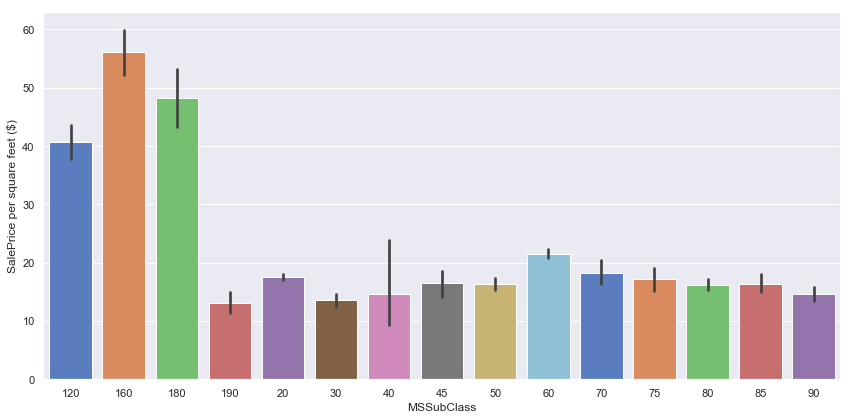

In [19]:
plt.figure(figsize=(7, 12))
class_price_plt = sns.factorplot(data=train_df,
                                 x='MSSubClass',
                                 y='SalePrice_per_squareFeet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
class_price_plt.despine(left=True)
class_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Among all building classes, the first three most expensive classes are "2-STORY PUD - 1946 & NEWER", "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER" and "1-STORY PUD (Planned Unit Development) - 1946 & NEWER".

"SalePrice_per_squareFeet" vs. "MSZoning"

<Figure size 504x864 with 0 Axes>

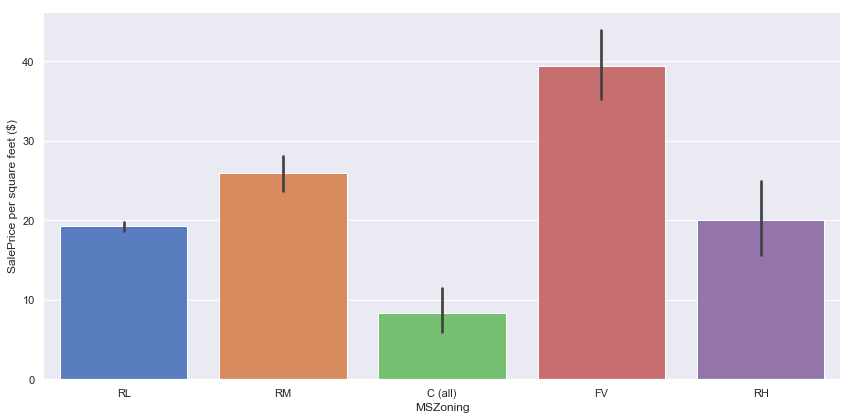

In [20]:
plt.figure(figsize=(7, 12))
zonecls_price_plt = sns.factorplot(data=train_df,
                                 x='MSZoning',
                                 y='SalePrice_per_squareFeet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
zonecls_price_plt.despine(left=True)
zonecls_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

The graph above studies the sale price per square feet in terms of general zoning classification. Among these 5 zoning classes, the sale price per square feet of "Floating Village Residential (FV)" is the most expensive, the zoning classes which are less expensive are "Residential Medium Density (RM)", "Residential High Density (RH)" and "Residential Low Density (RL)", the sale price per square feet of "Commercial (C)" is the cheapest among the 5 classes.

Considering the construction's difficulty and their rarity, we can obviously understand why the sale price per square feet of "Floating Village Residential (FV)" is the most expensive. However, there are less restrictions on the "Commercial" class, so it's the cheapest class.

"SalePrice_per_squareFeet" vs. "LotShape"

<Figure size 504x864 with 0 Axes>

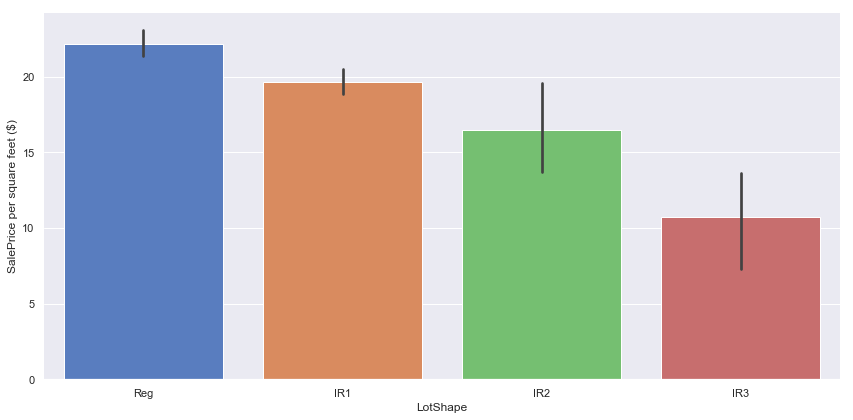

In [21]:
plt.figure(figsize=(7, 12))
lotshape_price_plt = sns.factorplot(data=train_df,
                                 x='LotShape',
                                 y='SalePrice_per_squareFeet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
lotshape_price_plt.despine(left=True)
lotshape_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

The relationship between General shape of property (LotShape) and the sale price per square feet is easily to understand: people usually like regular shape (Reg) of property, since it's simple for the overall arrangement and more confortable for living.

"SalePrice_per_squareFeet" vs. "Utilities"

<Figure size 504x864 with 0 Axes>

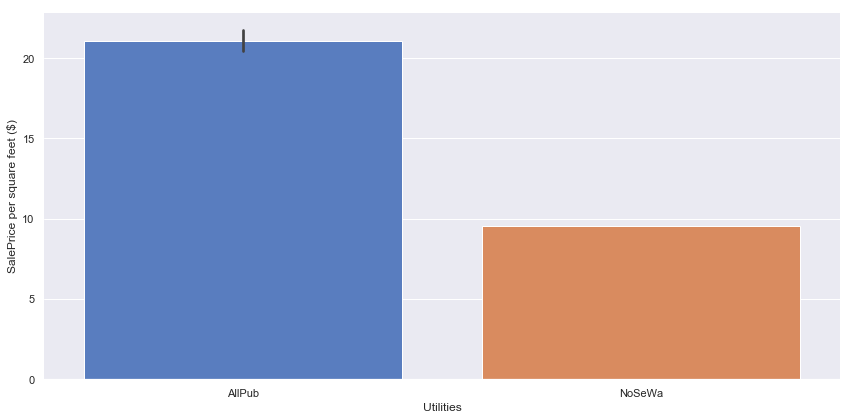

In [22]:
plt.figure(figsize=(7, 12))
utility_price_plt = sns.factorplot(data=train_df,
                                 x='Utilities',
                                 y='SalePrice_per_squareFeet',
                                 size=6,
                                 kind='bar',
                                 palette='muted',
                                 aspect=2)
utility_price_plt.despine(left=True)
utility_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

The result of this plot is interesting: we all know the more complete utilities are, the more expensive per square feet is. Except this point, we also get the price per square feet of a property whose all public utilities are available is double of the square feet-price of a property that only electricity and gas are available.

"SalePrice_per_squareFeet" vs. "LotConfig"

<Figure size 504x864 with 0 Axes>

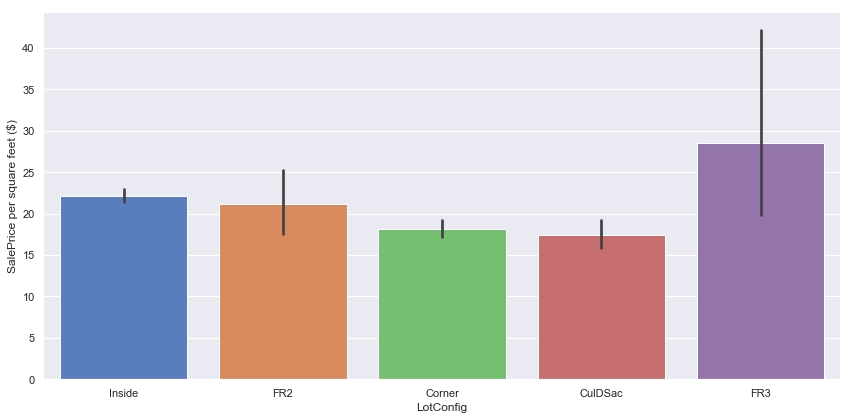

In [23]:
plt.figure(figsize=(7, 12))
lotconfig_price_plt = sns.factorplot(data=train_df,
                                     x='LotConfig',
                                     y='SalePrice_per_squareFeet',
                                     size=6,
                                     kind='bar',
                                     palette='muted',
                                     aspect=2)
lotconfig_price_plt.despine(left=True)
lotconfig_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Considering the lightness, the ventilation and the view, the lot with "Frontage on 3 sides of property" is the best, so its price per square feet is the most expensive among the 5 configurations. On the contrary, the lot which is located as a Cul-de-sac, its price per square feet is the cheapest.

"SalePrice_per_squareFeet" vs. "Neighborhood"

<Figure size 504x864 with 0 Axes>

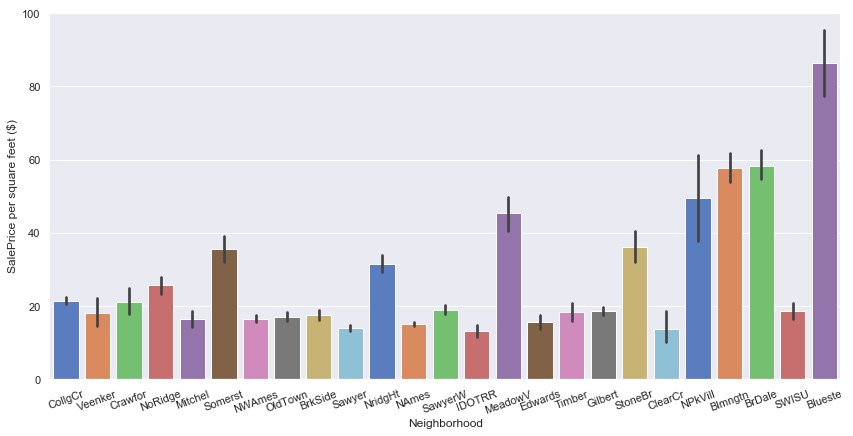

In [24]:
plt.figure(figsize=(7, 12))
neighbor_price_plt = sns.factorplot(data=train_df,
                                       x='Neighborhood',
                                       y='SalePrice_per_squareFeet',
                                       size=6,
                                       kind='bar',
                                       palette='muted',
                                       aspect=2)
neighbor_price_plt.despine(left=True)
neighbor_price_plt.set_ylabels('SalePrice per square feet ($)')
neighbor_price_plt.set_xticklabels(rotation=20)

plt.show()

Considering the economic / political / geographical reasons, if a lot is located near Bluestem, its price per square feet is nearly 90 dollars; moreover, if a lot is located near Bloomington Heights or Briardale, its price per square feet is about 60 dollars. However, if a lot is located near Clear Creek, its unit price is only about 15 dollars.

"SalePrice_per_squareFeet" vs. "OverallQual"

<Figure size 504x864 with 0 Axes>

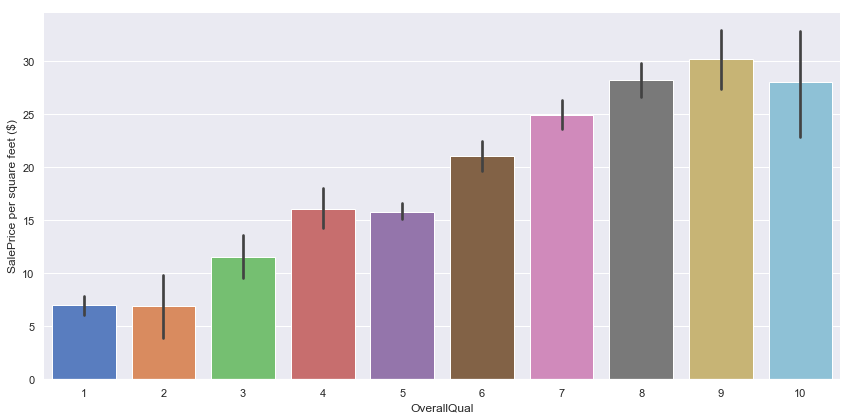

In [25]:
plt.figure(figsize=(7, 12))
overallQual_price_plt = sns.factorplot(data=train_df,
                                    x='OverallQual',
                                    y='SalePrice_per_squareFeet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
overallQual_price_plt.despine(left=True)
overallQual_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

The better the overall material is, the more expensive the lot is. The interesting point is median value of square feet price of "very excellent" lot is a little bit lower than "excellent" ones, but its variance is more than others.

"SalePrice_per_squareFeet" vs. "RoofMatl"

<Figure size 504x864 with 0 Axes>

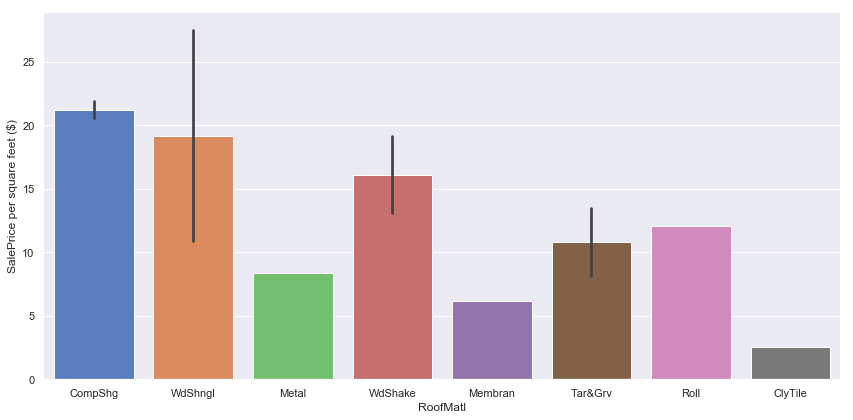

In [26]:
plt.figure(figsize=(7, 12))
roofMatl_price_plt = sns.factorplot(data=train_df,
                                    x='RoofMatl',
                                    y='SalePrice_per_squareFeet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
roofMatl_price_plt.despine(left=True)
roofMatl_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Considering the insulation, drainage, material cost and robustness, the lot with Standard (Composite) Shingle roof or Wood Shingles roof is more expensive than others. However, if a lot's roof is constucted by Clay or Tile, it's the relatively cheapest (per square feet) since its function is not as well as others.

"SalePrice_per_squareFeet" vs. "Heating"

<Figure size 504x864 with 0 Axes>

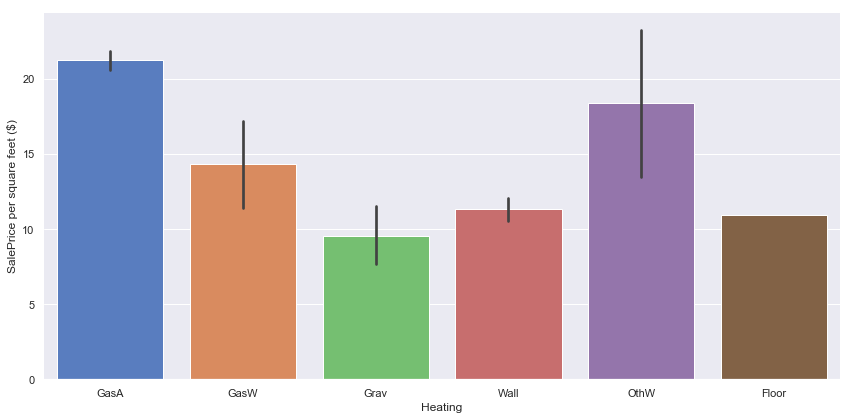

In [27]:
plt.figure(figsize=(7, 12))
heating_price_plt = sns.factorplot(data=train_df,
                                    x='Heating',
                                    y='SalePrice_per_squareFeet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
heating_price_plt.despine(left=True)
heating_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Considering material cost and construction-difficulties, the lot with "Gas forced warm air furnace" heating is more expensive than other heating types.

"SalePrice_per_squareFeet" vs. "GarageType"

<Figure size 504x864 with 0 Axes>

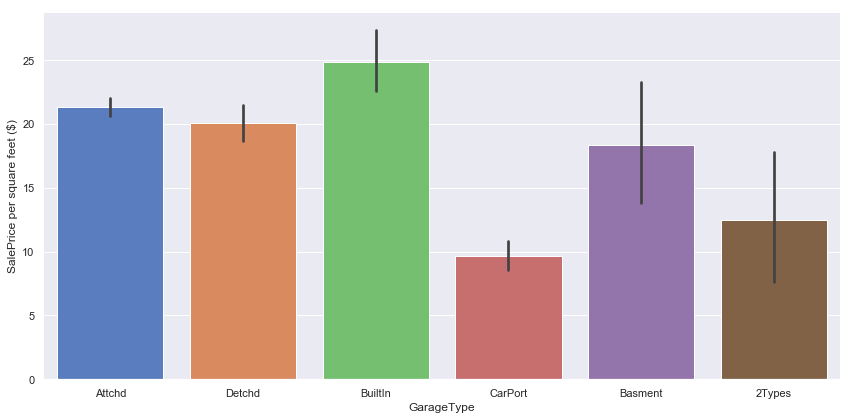

In [28]:
plt.figure(figsize=(7, 12))
garageType_price_plt = sns.factorplot(data=train_df,
                                    x='GarageType',
                                    y='SalePrice_per_squareFeet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
garageType_price_plt.despine(left=True)
garageType_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Considering construction and property's convenience, the lot with built-in garage is more expensive than other types of garage, the lot only with car port as the garage is the cheapest in terms of per square feet's price.

"SalePrice_per_squareFeet" vs. "SaleType"

<Figure size 504x864 with 0 Axes>

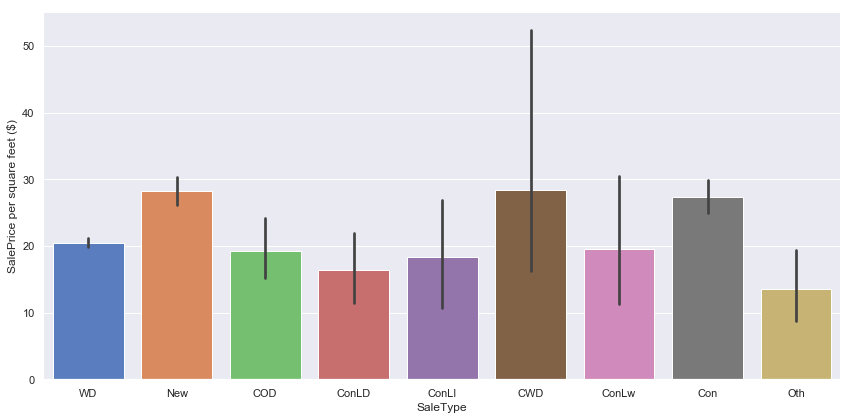

In [29]:
plt.figure(figsize=(7, 12))
saleType_price_plt = sns.factorplot(data=train_df,
                                    x='SaleType',
                                    y='SalePrice_per_squareFeet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
saleType_price_plt.despine(left=True)
saleType_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Let's talk about the impact of sale type on the sale price. There is no doubt that the new lot which is just constructed and sold is the most expensive because its loss is the least. But I'm not clear for the reason of why other types of sale are less expensive. If you know why, your ideas are welcome :)

"SalePrice_per_squareFeet" vs. "SaleCondition"

<Figure size 504x864 with 0 Axes>

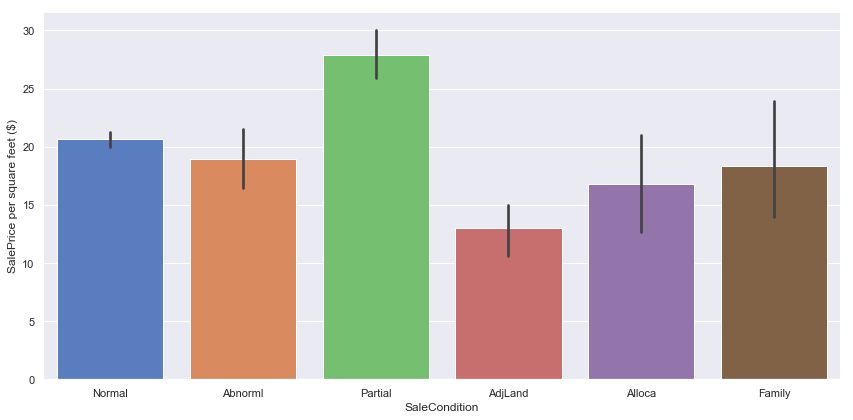

In [30]:
plt.figure(figsize=(7, 12))
saleCdt_price_plt = sns.factorplot(data=train_df,
                                    x='SaleCondition',
                                    y='SalePrice_per_squareFeet',
                                    size=6,
                                    kind='bar',
                                    palette='muted',
                                    aspect=2)
saleCdt_price_plt.despine(left=True)
saleCdt_price_plt.set_ylabels('SalePrice per square feet ($)')

plt.show()

Among all sold lots, a lot is more expensive than others if it was not completed when last assessed (associated with New Homes), but it's less expensive for the adjoining land purchase.

## Data preprocessing for building models

In [31]:
# num_attribs = train_df.drop(columns=['MSSubClass', 'OverallCond',
#                                      'MoSold', 'YrSold',
#                                      'SalePrice_per_squareFeet',
#                                      'SalePrice']).dtypes[train_df.dtypes != "object"].index

num_attribs = train_df.drop(columns=['MSSubClass', 'OverallCond',
                                     'MoSold', 'YrSold',
                                     'SalePrice_per_squareFeet',
                                     'SalePrice']).dtypes[train_df.dtypes != "object"].index

cat_attribs = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'OverallCond',
               'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
               'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
               'GarageCond', 'PavedDrive', 'YrSold', 'MoSold', 'SaleType', 'SaleCondition']

### Label encoding categorical variables

In [32]:
# process columns, apply LabelEncoder to categorical features
for col in cat_attribs:
    lbl_train = LabelEncoder() 
    lbl_train.fit(list(train_df[col].values)) 
    train_df[col] = lbl_train.transform(list(train_df[col].values))

for col in cat_attribs:
    lbl_test = LabelEncoder() 
    lbl_test.fit(list(test_df[col].values)) 
    test_df[col] = lbl_test.transform(list(test_df[col].values))

In [33]:
train_df.shape

(1460, 77)

In [34]:
test_df.shape

(1459, 75)

In [35]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_squareFeet
0,1,9,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,4,2,8,4,208500,24.674556
1,2,4,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,7,1,8,4,181500,18.906250
2,3,9,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,11,2,8,4,223500,19.866667
3,4,10,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,4,0,8,0,140000,14.659686
4,5,9,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,3,2,8,4,250000,17.531557


### Skewed features for numeric variables

In [36]:
from scipy.stats import skew, boxcox_normmax
skewed_train_df = train_df[num_attribs].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_test_df = test_df[num_attribs].apply(lambda x: skew(x)).sort_values(ascending=False)

**Box Cox Transformation of (highly) skewed features**

In [37]:
high_skewed_train_var = skewed_train_df[skewed_train_df > 0.5]
high_skewed_test_var = skewed_test_df[skewed_test_df > 0.5]

In [38]:
from scipy.special import boxcox1p
high_skewed_train_idx = high_skewed_train_var.index
high_skewed_test_idx = high_skewed_test_var.index

In [39]:
for idx in high_skewed_train_idx:
    train_df[idx] = boxcox1p(train_df[idx], boxcox_normmax(train_df[idx] + 1))

for idx in high_skewed_test_idx:
    test_df[idx] = boxcox1p(test_df[idx], boxcox_normmax(test_df[idx] + 1))

In [40]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_squareFeet
0,1,9,3,9.646419,8.670456,1,3,3,0,4,...,0.0,0.0,0.0,0.0,4,2,8,4,208500,24.674556
1,2,4,3,10.586091,8.787628,1,3,3,0,2,...,0.0,0.0,0.0,0.0,7,1,8,4,181500,18.906250
2,3,9,3,9.844617,8.933083,1,0,3,0,4,...,0.0,0.0,0.0,0.0,11,2,8,4,223500,19.866667
3,4,10,3,9.302748,8.782836,1,0,3,0,0,...,0.0,0.0,0.0,0.0,4,0,8,0,140000,14.659686
4,5,9,3,10.817368,9.150118,1,0,3,0,2,...,0.0,0.0,0.0,0.0,3,2,8,4,250000,17.531557


In [41]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['YrBltAndRemod'] = train_df['YearBuilt']+train_df['YearRemodAdd']
train_df['Total_sqr_footage'] = (train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] +
                                 train_df['1stFlrSF'] + train_df['2ndFlrSF'])
train_df['Total_Bathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) +
                               train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))
train_df['Total_porch_sf'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +
                              train_df['EnclosedPorch'] + train_df['ScreenPorch'] +
                              train_df['WoodDeckSF'])

In [42]:
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['YrBltAndRemod'] = test_df['YearBuilt']+test_df['YearRemodAdd']
test_df['Total_sqr_footage'] = (test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] +
                                 test_df['1stFlrSF'] + test_df['2ndFlrSF'])
test_df['Total_Bathrooms'] = (test_df['FullBath'] + (0.5 * test_df['HalfBath']) +
                               test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']))
test_df['Total_porch_sf'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +
                              test_df['EnclosedPorch'] + test_df['ScreenPorch'] +
                              test_df['WoodDeckSF'])

### Separate training set and validation set

In [43]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_squareFeet,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,1,9,3,9.646419,8.670456,1,3,3,0,4,...,2,8,4,208500,24.674556,1530.898875,4006,1396.550423,3.529850,12.049772
1,2,4,3,10.586091,8.787628,1,3,3,0,2,...,1,8,4,181500,18.906250,347.904540,3952,152.473862,2.341253,62.298509


In [44]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# apply log(1+x) to all 'SalePrice'
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

X = train_df.drop(columns=['Id', 'SalePrice_per_squareFeet', 'SalePrice'])
y = train_df['SalePrice']

X_train, X_validation, y_train, y_validation = train_test_split(X,
                                                                y,
                                                                test_size=0.25,
                                                                random_state=42)


In [45]:
X_train.shape

(1095, 79)

In [46]:
X_validation.shape

(365, 79)

## Train models

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

lin_rg = make_pipeline(RobustScaler(), LinearRegression())
print('cv_rmse:', cv_rmse(lin_rg).mean())

lin_rg.fit(X_train, y_train)
y_pred_lin_rg = lin_rg.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_lin_rg))

cv_rmse: 656472772.848994
rmsle: 0.1419980306062515


### Ridge Regression

In [49]:
from sklearn.linear_model import Ridge

ridge_rg = make_pipeline(RobustScaler(), Ridge(alpha=50, solver='cholesky', random_state=42))
print('cv_rmse:', cv_rmse(ridge_rg).mean())

ridge_rg.fit(X_train, y_train)
y_pred_ridge_rg = ridge_rg.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_ridge_rg))

cv_rmse: 0.1366767250645518
rmsle: 0.13537983502282885


### Lasso Regression

In [50]:
from sklearn.linear_model import Lasso

lasso_rg = make_pipeline(RobustScaler(), Lasso(alpha =0.001, random_state=42))
print('cv_rmse:', cv_rmse(lasso_rg).mean())

lasso_rg.fit(X_train, y_train)
y_pred_lasso_rg = lasso_rg.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_lasso_rg))

cv_rmse: 0.13634200349839412
rmsle: 0.1349624151668101


### Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet

elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.004, l1_ratio=0.5, random_state=42))
print('cv_rmse:', cv_rmse(elastic_net).mean())

elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_elastic_net))

cv_rmse: 0.13601310403694988
rmsle: 0.13253624199316813


### Apply Ridge Regression, Lasso Regression and Elastic Net with cross-validation

In [52]:
alphas_alt = [14, 20, 40]
alphas2 = [5e-05, 0.0001, 0.0005, 0.001]
e_alphas = [0.0001, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.5, 0.85, 1]

In [53]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

ridge_rg_CV = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
print('cv_rmse:', cv_rmse(ridge_rg_CV).mean())

ridge_rg_CV.fit(X_train, y_train)
y_pred_ridge_rg_CV = ridge_rg_CV.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_ridge_rg_CV))

cv_rmse: 0.13668574016835233
rmsle: 0.1357445147174281


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
lasso_rg_CV = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, cv=kfolds, random_state=42))
print('cv_rmse:', cv_rmse(lasso_rg_CV).mean())

lasso_rg_CV.fit(X_train, y_train)
y_pred_lasso_rg_CV = lasso_rg_CV.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_lasso_rg_CV))

cv_rmse: 0.13634200349839412
rmsle: 0.1349624151668101


In [55]:
elastic_net_CV = make_pipeline(RobustScaler(),
                               ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds,
                                            l1_ratio=e_l1ratio, random_state=42))
print('cv_rmse:', cv_rmse(elastic_net_CV).mean())

elastic_net_CV.fit(X_train, y_train)
y_pred_elastic_net_CV = elastic_net_CV.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_elastic_net_CV))

cv_rmse: 0.13671855917950484
rmsle: 0.1367570148118042


### SVR

In [56]:
from sklearn.svm import SVR

svr_mdl = SVR(C=5, epsilon=0.05, gamma=0.00001)
svr_mdl.fit(X_train, y_train)

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
y_pred_svr = svr_mdl.predict(X_validation)
rmsle(y_validation, y_pred_svr)

0.1873027303555312

### Linear SVR

In [58]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(epsilon=0.01, random_state=42)
lsvr.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.01, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [59]:
y_pred_linSVR = lsvr.predict(X_validation)
rmsle(y_validation, y_pred_linSVR)

0.18081545500905108

### Gradient Boosting Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, max_depth=4,
                                max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state =42)
print('cv_rmse:', cv_rmse(gbr).mean())

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_gbr))

cv_rmse: 0.12194031860078192
rmsle: 0.12503183049426456


### XGBoost Regressor

In [61]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(learning_rate=0.01,
                    n_estimators=4700,
                    max_depth=3,
                    min_child_weight=0,
                    gamma=0.01,
                    subsample=0.7,
                    colsample_bytree=0.7,
                    objective='reg:linear',
                    nthread=-1,
                    scale_pos_weight=1,
                    seed=27,
                    reg_alpha=0.00005)

xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_validation)
print('cv_rmse:', cv_rmse(xgbr).mean())
print('rmsle:', rmsle(y_validation, y_pred_xgbr))

[22:37:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:37:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:37:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:38:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:39:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
cv_rmse: 0.11647749458252263
rmsle: 0.11999105644878395


### Blending models

In [62]:
def blend_models_predict(X):
    return (
            (0.1 * elastic_net_CV.fit(X_train, y_train).predict(X)) + \
            (0.1 * lasso_rg_CV.fit(X_train, y_train).predict(X)) + \
            (0.1 * ridge_rg_CV.fit(X_train, y_train).predict(X)) + \
            (0.3 * gbr.fit(X_train, y_train).predict(X)) + \
            (0.4 * xgbr.fit(X_train, y_train).predict(X)))

In [63]:
rmsle(y_validation, blend_models_predict(X_validation))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:41:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.12090176907181147

## Prediction with test data

In [64]:
y_test = xgbr.predict(test_df.drop(columns='Id'))
# y_test = blend_models_predict(test_df.drop(columns='Id'))

# Inspired by "What is the inverse of numpy's log1p?"
# <https://stackoverflow.com/questions/50049891/what-is-the-inverse-of-numpys-log1p>
y_test = np.expm1(y_test)

In [65]:
test_id = test_df['Id']
output_df = pd.DataFrame({'Id':test_id,
                          'SalePrice': y_test},
                         columns=['Id', 'SalePrice'])

In [66]:
output_df.head()

,Id,SalePrice
0,1461,139656.421875
1,1462,152008.000000
2,1463,173972.125000
3,1464,186091.093750
4,1465,197053.671875


In [67]:
output_df.to_csv('house_price_prediction.csv', index=False)

## References
- House Prices: Advanced Regression Techniques
    <https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1>
- Stacked Regressions to predict House Prices
    <https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard>